# 数据分析常用图表的绘制

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

## 1. [Subplots](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots)

In [ ]:
plt.figure()
# 表示1行2列，现在在第一个子图上进行操作
plt.subplot(1, 2, 1)

linear_data = np.arange(1, 9)
plt.plot(linear_data, '-o')

In [ ]:
exponential_data = linear_data ** 2
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-x')

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

In [ ]:
# 保证子图中坐标范围一致
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True)
ax5.plot(exponential_data, '-')

## 2. [直方图](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20hist#matplotlib.pyplot.hist)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0., scale=1., size=sample_size)
    # 默认bin的个数为10
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0., scale=1., size=sample_size)
    # bin设为100
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


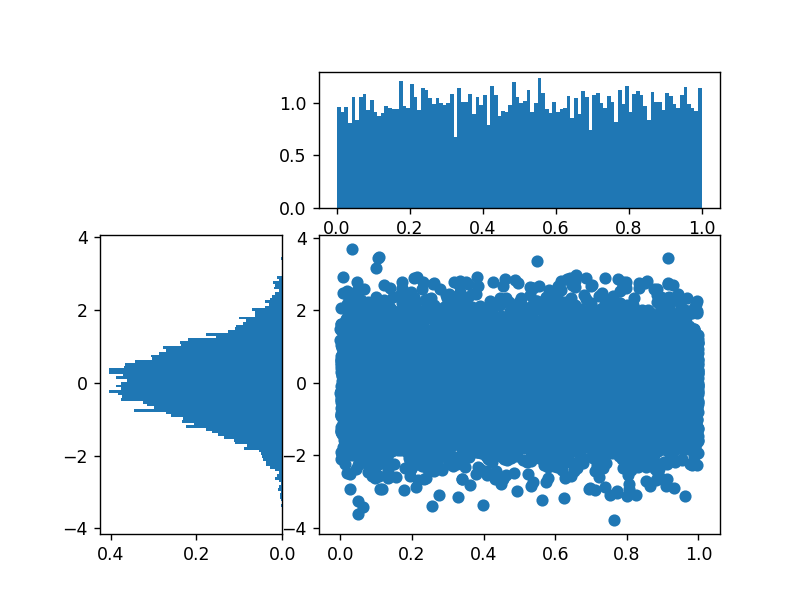

In [2]:
# 使用gridspec和直方图绘制一个复杂分析图
import matplotlib.gridspec as gridspec

x = np.random.random(size=10000)
y = np.random.normal(loc=0., scale=1., size=10000)

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_hist = plt.subplot(gspec[0, 1:])
side_hist = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(x, y)
top_hist.hist(x, bins=100, normed=True)
side_hist.hist(y, bins=100, orientation='horizontal', normed=True)
side_hist.invert_xaxis()

## 3. [盒形图](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

In [3]:
import pandas as pd
# 正态分布采样
normal_sample = np.random.normal(loc=0., scale=1., size=10000)
# 随机数采样
random_sample = np.random.random(size=10000)
# gamma分布采样
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                  'random': random_sample,
                  'gamma': gamma_sample})

In [4]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,2.000081,0.022917,0.501495
std,1.424523,0.999018,0.287273
min,0.009821,-3.771511,0.000077
25%,0.956011,-0.649522,0.254433
50%,1.666060,0.019103,0.505085
75%,2.711737,0.698000,0.745838
max,18.486219,4.066650,0.999916


<IPython.core.display.Javascript object>


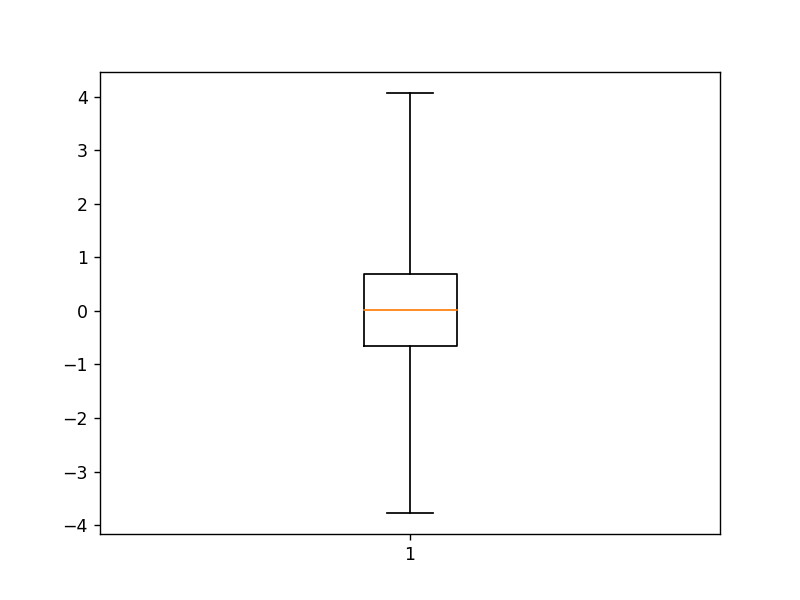

{'boxes': [<matplotlib.lines.Line2D at 0xaeb5b00>],
 'caps': [<matplotlib.lines.Line2D at 0xaebfe80>,
 'fliers': [<matplotlib.lines.Line2D at 0xaed1da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xaec7ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xaeb5cc0>,
  <matplotlib.lines.Line2D at 0xaebfcc0>]}

In [5]:
plt.figure()
plt.boxplot(df['normal'], whis='range')

<IPython.core.display.Javascript object>


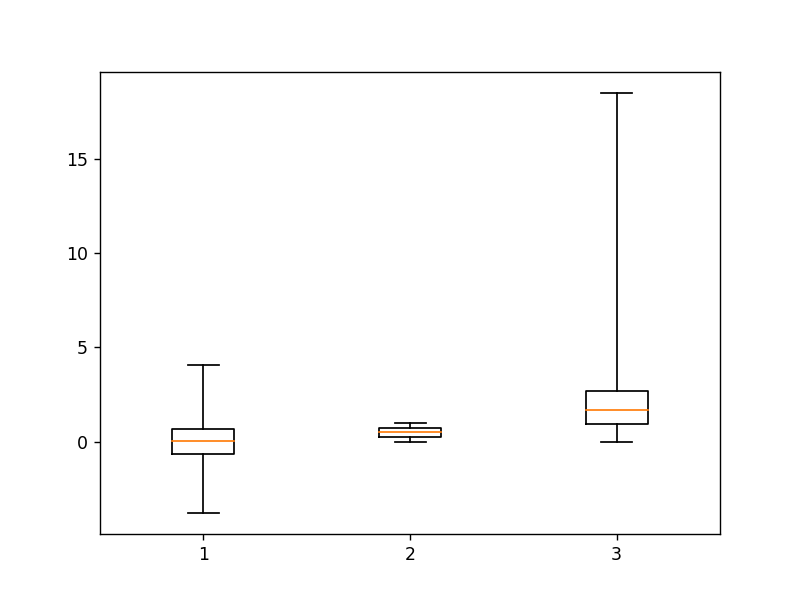

{'boxes': [<matplotlib.lines.Line2D at 0xaef2208>,
 'caps': [<matplotlib.lines.Line2D at 0x9909978>,
 'fliers': [<matplotlib.lines.Line2D at 0xaf45b70>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x8a4d5c0>,
 'whiskers': [<matplotlib.lines.Line2D at 0xae7bcc0>,
  <matplotlib.lines.Line2D at 0xaf73d30>]}

In [6]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')

In [ ]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']])

## 4. [热图](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist2d.html?highlight=matplotlib%20axes%20axes%20hist2d#matplotlib.axes.Axes.hist2d)

In [ ]:
plt.figure()
y = np.random.normal(loc=0., scale=1., size=10000)
x = np.random.random(size=10000)
plt.hist2d(x, y, bins=25)

In [ ]:
plt.figure()
y = np.random.normal(loc=0., scale=1., size=10000)
x = np.random.random(size=10000)
plt.hist2d(x, y, bins=100)

In [ ]:
plt.colorbar()